In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [3]:
test_df=pd.read_csv('test.csv')
test_df.head(5)

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [4]:
submission_df=pd.read_csv('Sample__submission.csv')
submission_df

,id,price1
0,19841,193
1,19157,340
2,19445,637
3,8046,679
4,4571,190
...,...,...
5239,14488,727
5240,6273,805
5241,12429,673
5242,8847,130


In [5]:
df.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [6]:
df['iswomen'] = ['Women' if 'omen' in x else 'Men' for x in df['title']]


In [7]:
df

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,iswomen
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0,Women
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1,Men
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1,Women
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,Men
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,16554,Women Maroon Heels Sandal,4.3,Women,Flipkart,567,1199,52.71%,807.0,114.0,485.0,177.0,61.0,41,43,0,Women
15726,19600,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499,998,50.00%,246.0,34.0,120.0,45.0,37.0,16,28,1,Women
15727,6733,Women Navy Flats Sandal,3.7,Women,Flipkart,329,499,34.07%,NaN,18.0,NaN,NaN,20.0,10,15,1,Women
15728,3889,Red Chief Men's Sneakers,3.9,Men,Amazon,2249,4499,50.01%,750.0,479.0,13.0,6.0,10.0,25,47,1,Men


In [8]:
test_df['iswomen'] = ['Women' if 'omen' in x else 'Men' for x in test_df['title']]

In [9]:
df['maincateg'].fillna(df['iswomen'],inplace=True)
test_df['maincateg'].fillna(test_df['iswomen'],inplace=True)

<AxesSubplot:>

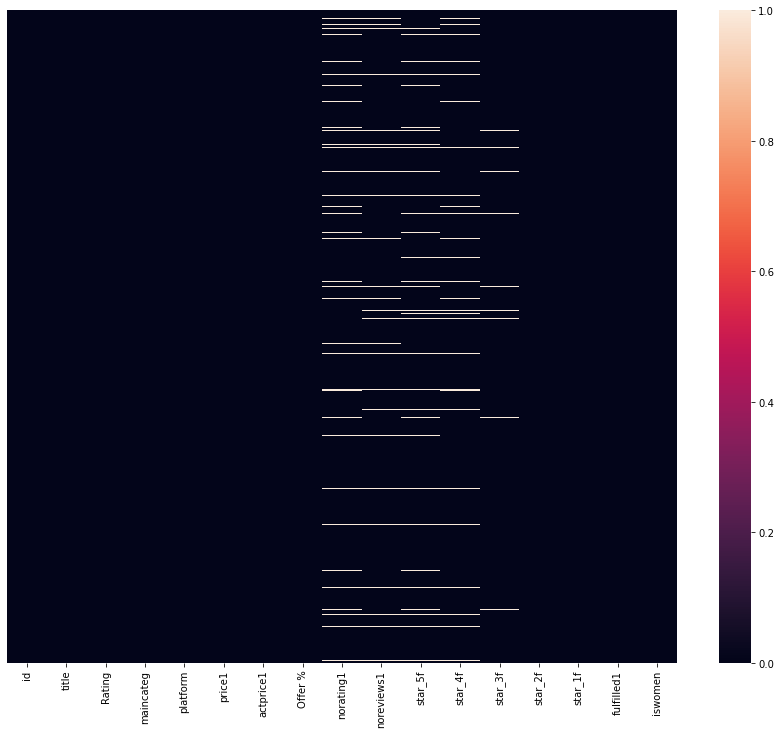

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(),yticklabels=False)

<AxesSubplot:>

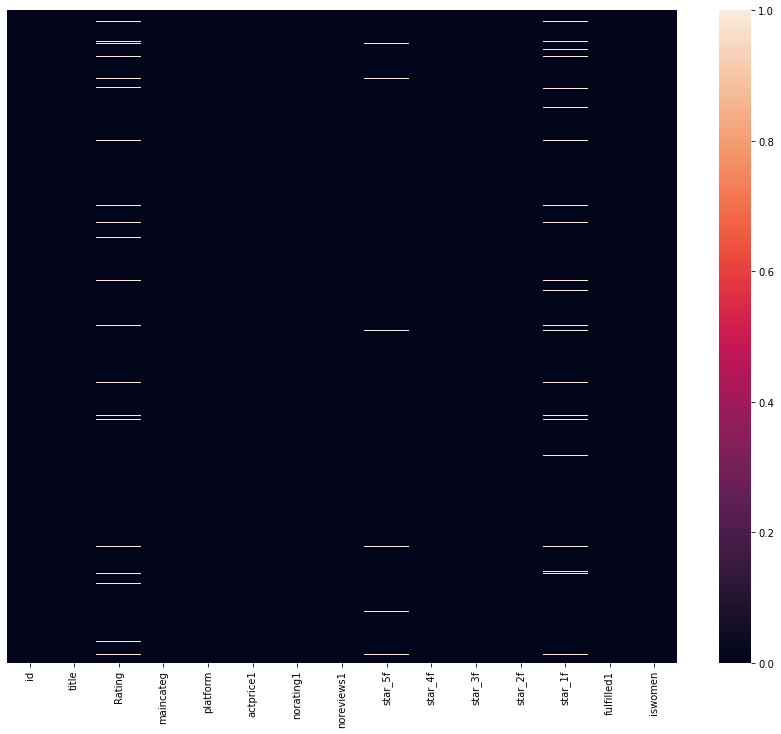

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(test_df.isnull(),yticklabels=False)

In [12]:
df1=df.dropna(thresh=14,axis=0)

In [13]:
df1.shape

(15379, 17)

<AxesSubplot:>

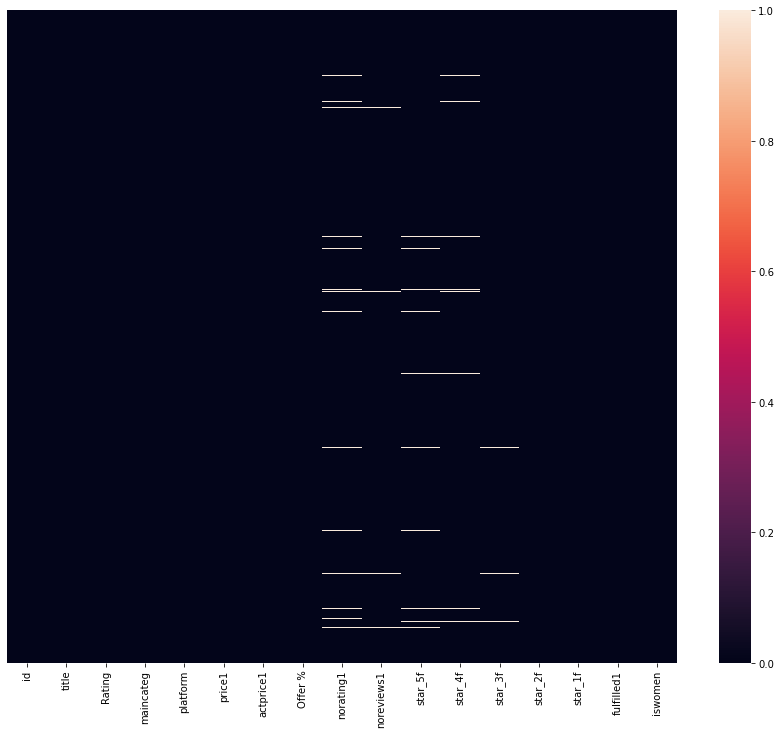

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df1.isnull(),yticklabels=False)

In [15]:
df1.isna().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     338
noreviews1    251
star_5f       259
star_4f       222
star_3f        64
star_2f         0
star_1f         0
fulfilled1      0
iswomen         0
dtype: int64

In [16]:
df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,iswomen
1197,1099,DOCTOR EXTRA SOFT Ortho Care Diabetic Orthopae...,4.0,Men,Flipkart,499,799,37.55%,3046.0,425.0,0.0,0.0,0.0,0,0,1,Men
1413,12126,Jutis For Men (Tan),4.3,Men,Flipkart,1530,1699,9.95%,22.0,5.0,0.0,0.0,0.0,0,0,0,Men
1578,16727,"Cosko Sports Shoes,Running Shoes,Walking Shoes...",4.1,Men,Flipkart,699,999,30.03%,122519.0,17774.0,0.0,0.0,0.0,0,0,1,Men
1783,1108,Women Multicolor Wedges Sandal,4.1,Women,Flipkart,845,1690,50.00%,53.0,10.0,0.0,0.0,0.0,0,0,1,Women
1997,12141,Ladies New casuals Boots For Women (Black),3.4,Women,Flipkart,899,999,10.01%,8.0,0.0,0.0,0.0,0.0,0,0,0,Women
2084,10286,Jutis For Men (Brown),4.0,Men,Flipkart,498,499,0.20%,441.0,40.0,0.0,0.0,0.0,0,0,0,Men
2368,1084,Lace Up For Men (Maroon),4.4,Men,Flipkart,2195,3990,44.99%,27.0,5.0,0.0,0.0,0.0,0,0,1,Men
2487,10356,Women Pink Flats Sandal,4.0,Women,Flipkart,699,999,30.03%,116.0,16.0,0.0,0.0,0.0,0,0,0,Women
3449,20022,Corporate Casuals For Men (Black),4.0,Men,Flipkart,421,999,57.86%,2224.0,330.0,0.0,0.0,0.0,0,0,1,Men
3726,12745,Modern Runner Running Shoes For Men (Black),4.1,Men,Flipkart,1799,2999,40.01%,9.0,0.0,0.0,0.0,0.0,0,0,1,Men


In [17]:
df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0]=df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0].replace(0,np.nan)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\123482917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0]=df1[df1['star_2f']+df1['star_1f']+df1['star_3f']+df1['star_4f']+df1['star_5f']==0].replace(0,np.nan)


In [18]:
df1[df1['star_2f']==0]

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,iswomen
27,19308,Boots For Women (Brown),4.2,Women,Flipkart,599,999,40.04%,10.0,0.0,6.0,2.0,1.0,0.0,1.0,1.0,Women
30,17412,Trendy Look Up Jeans And Kurta Pajama/Syntheti...,3.8,Men,Flipkart,499,999,50.05%,21.0,4.0,13.0,2.0,0.0,0.0,6.0,0.0,Men
40,10752,Women's/Ladies/Female/Girls Lightweight Comfor...,4.4,Women,Flipkart,525,999,47.45%,5.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,Women
51,3239,DD66_4 Jutis For Women (White),4.5,Women,Flipkart,1499,2500,40.04%,13.0,1.0,11.0,0.0,1.0,0.0,1.0,0.0,Women
53,12960,"Men Tan, Beige, Yellow Sandal",4.2,Men,Flipkart,389,999,61.06%,19.0,2.0,12.0,2.0,3.0,0.0,2.0,0.0,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15673,1806,Boots For Women (Burgundy),4.5,Women,Flipkart,1589,5299,70.01%,88.0,17.0,58.0,22.0,5.0,0.0,4.0,0.0,Women
15680,6567,Extra Soft Sneakers For Women (Yellow),4.5,Women,Flipkart,699,999,30.03%,22.0,1.0,16.0,2.0,3.0,0.0,1.0,1.0,Women
15713,20375,Boots For Women (Black),3.5,Women,Flipkart,479,550,12.91%,6.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,Women
15724,16403,Mojaris For Men (Brown),5.0,Men,Flipkart,649,2199,70.49%,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,Men


In [19]:
df1.isna().sum()

id              0
title           0
Rating          0
maincateg       0
platform        0
price1          0
actprice1       0
Offer %         0
norating1     338
noreviews1    255
star_5f       304
star_4f       267
star_3f       109
star_2f        45
star_1f        45
fulfilled1     15
iswomen         0
dtype: int64

In [20]:
df1['fulfilled1']=df1['fulfilled1'].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\947064795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fulfilled1']=df1['fulfilled1'].fillna(0)


In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# from sklearn.linear_model import LinearRegression
# lr=LinearRegression()
mice_cols = ['Rating','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f']

# Define MICE Imputer and fill missing values
imputer = IterativeImputer()
df1[mice_cols]=imputer.fit_transform(df1[mice_cols])
test_df[mice_cols]=imputer.transform(test_df[mice_cols])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\1973608177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[mice_cols]=imputer.fit_transform(df1[mice_cols])


In [22]:
df1.shape

(15379, 17)

In [23]:
df1['review%']=df1['noreviews1']/df1['norating1']*100

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\2027789631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['review%']=df1['noreviews1']/df1['norating1']*100


In [24]:
df1.loc[df1['review%']>100]
df1.drop(df1.index[df1['review%'] >100], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\1585428406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(df1.index[df1['review%'] >100], inplace=True)


In [25]:
df1["Offer %"]=df1["Offer %"].str.replace("%","")
df1['Offer %'] = df1['Offer %'].astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\2928584276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Offer %"]=df1["Offer %"].str.replace("%","")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\2928584276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Offer %'] = df1['Offer %'].astype(float)


In [26]:
df1[['price1','actprice1']] = df1[['actprice1','price1']].where(df1['actprice1']<df1['price1'], df1[['price1','actprice1']].values)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\873310573.py:1: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df1[['price1','actprice1']] = df1[['actprice1','price1']].where(df1['actprice1']<df1['price1'], df1[['price1','actprice1']].values)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\873310573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['price1','actprice1']] = df1[['actprice1','price1']].where(df1['actprice1']<df1['price1'], df1[['price1','actprice1']].values)


In [27]:
df1['positive_feedback']=df1['star_5f']+df1['star_4f']
df1['negative_feedback']=df1['star_3f']+df1['star_2f']+df1['star_1f']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\272329121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['positive_feedback']=df1['star_5f']+df1['star_4f']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\272329121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['negative_feedback']=df1['star_3f']+df1['star_2f']+df1['star_1f']


In [28]:
# df1['good_prod']=df1['positive_feedback']/(df1['positive_feedback']+df1['negative_feedback'])*100

In [29]:
df2=df1.drop(columns=['id','iswomen','review%'])

In [30]:
df2[df2['negative_feedback']==0]

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,positive_feedback,negative_feedback
171,Jutis For Men (Brown),5.0,Men,Flipkart,449.0,749,40.05,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
222,Slippers,4.7,Women,Flipkart,599.0,1199,50.04,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
265,SL-172 Women Walking Shoes For Women (Pink),4.5,Women,Flipkart,798.0,799,0.13,6.0,0.0,3.0,3.0,0.0,0.0,0.0,1.0,6.0,0.0
294,WMNS NIKE ZOOM WINFLO 7 Training & Gym Shoes F...,4.7,Women,Flipkart,4785.0,7995,40.15,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
301,D'LITES-RUNWAY READY Sneakers For Women (White),4.8,Women,Flipkart,3574.0,6499,45.01,10.0,0.0,8.0,2.0,0.0,0.0,0.0,1.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15552,"Women Black, Silver, Gold Sports Sandal",4.8,Women,Flipkart,569.0,1299,56.20,4.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0
15591,Ethnic Mule For Women (Multicolor),4.7,Women,Flipkart,219.0,1299,83.14,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0
15632,WMNS NIKE REVOLUTION 5 Running Shoes For Women...,4.7,Women,Flipkart,2217.0,3695,40.00,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
15724,Mojaris For Men (Brown),5.0,Men,Flipkart,649.0,2199,70.49,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [31]:
df2.isna().sum()

title                0
Rating               0
maincateg            0
platform             0
price1               0
actprice1            0
Offer %              0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
positive_feedback    0
negative_feedback    0
dtype: int64

In [32]:
# df2.drop(df2[df2['negative_feedback']==0].index, inplace = True)

In [33]:
df3=df2

In [34]:
df3

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,positive_feedback,negative_feedback
0,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698.0,999,30.13,38.000000,7.0,17.000000,9.00000,6.0,3.0,3.0,0.0,26.000000,12.0
1,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999.0,1999,50.03,531.000000,69.0,264.000000,92.00000,73.0,29.0,73.0,1.0,356.000000,175.0
2,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749.0,4999,45.01,17.000000,4.0,11.000000,3.00000,2.0,1.0,0.0,1.0,14.000000,3.0
3,Men Black Sports Sandal,4.2,Men,Flipkart,518.0,724,15.85,46413.000000,6229.0,1045.000000,12416.00000,5352.0,701.0,4595.0,1.0,13461.000000,10648.0
4,Men Green Sports Sandal,3.9,Men,Flipkart,1379.0,2299,40.02,77.000000,3.0,35.000000,21.00000,7.0,7.0,7.0,1.0,56.000000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,Women Maroon Heels Sandal,4.3,Women,Flipkart,567.0,1199,52.71,807.000000,114.0,485.000000,177.00000,61.0,41.0,43.0,0.0,662.000000,145.0
15726,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499.0,998,50.00,246.000000,34.0,120.000000,45.00000,37.0,16.0,28.0,1.0,165.000000,81.0
15727,Women Navy Flats Sandal,3.7,Women,Flipkart,329.0,499,34.07,202.673581,18.0,130.688779,37.46565,20.0,10.0,15.0,1.0,168.154429,45.0
15728,Red Chief Men's Sneakers,3.9,Men,Amazon,2249.0,4499,50.01,750.000000,479.0,13.000000,6.00000,10.0,25.0,47.0,1.0,19.000000,82.0


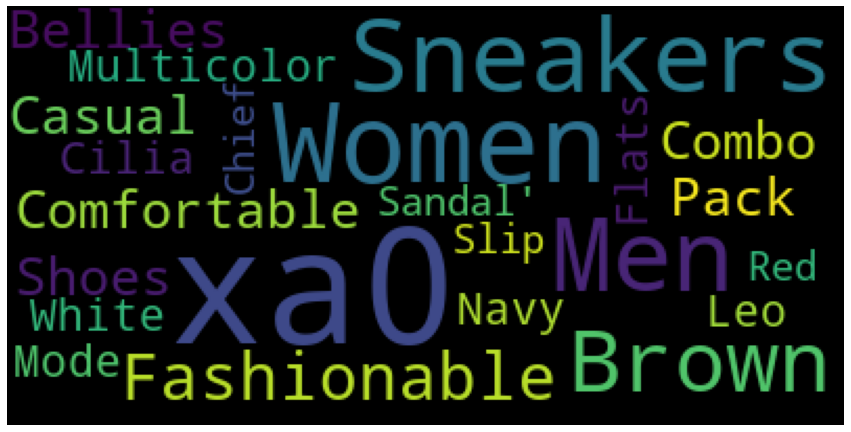

In [35]:
from wordcloud import WordCloud, STOPWORDS
text = df['title'].values 

wordclouds = WordCloud().generate(str(text))
plt.figure(figsize = (15, 15))
plt.imshow(wordclouds)
plt.axis("off")
plt.show()

In [36]:
text

array(['Fashionable & Comfortable Bellies For Women\xa0\xa0(Brown)',
       'Combo Pack of 4 Casual Shoes Sneakers For Men\xa0\xa0(Multicolor)',
       'Cilia Mode Leo Sneakers For Women\xa0\xa0(White)', ...,
       'Women Navy Flats Sandal', "Red Chief Men's Sneakers",
       'Slip On For Men\xa0\xa0(Brown)'], dtype=object)

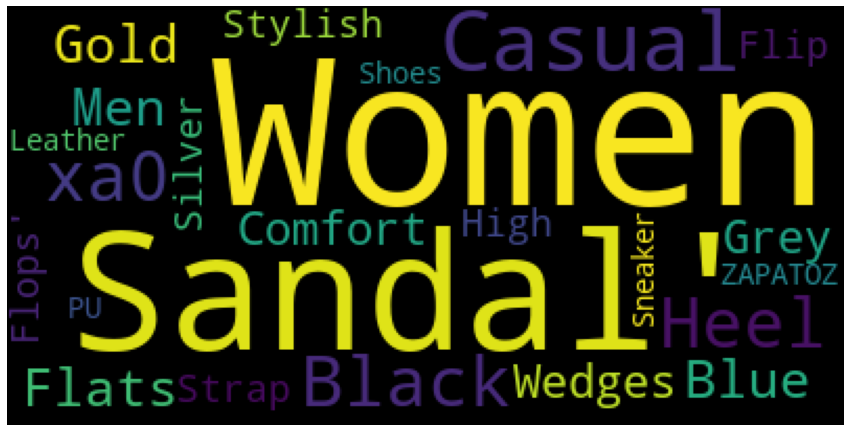

In [37]:
text1 = test_df['title'].values 

wordclouds = WordCloud().generate(str(text1))
plt.figure(figsize = (15, 15))
plt.imshow(wordclouds)
plt.axis("off")
plt.show()

In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15364 entries, 0 to 15729
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              15364 non-null  object 
 1   Rating             15364 non-null  float64
 2   maincateg          15364 non-null  object 
 3   platform           15364 non-null  object 
 4   price1             15364 non-null  float64
 5   actprice1          15364 non-null  int64  
 6   Offer %            15364 non-null  float64
 7   norating1          15364 non-null  float64
 8   noreviews1         15364 non-null  float64
 9   star_5f            15364 non-null  float64
 10  star_4f            15364 non-null  float64
 11  star_3f            15364 non-null  float64
 12  star_2f            15364 non-null  float64
 13  star_1f            15364 non-null  float64
 14  fulfilled1         15364 non-null  float64
 15  positive_feedback  15364 non-null  float64
 16  negative_feedback  153

In [39]:
arr=['Casual','Sneaker','Sandal','Flats','Comfort','Shoes','Black','Brown','White','Navy','Multicolor','Blue','Grey','Gold','Silver','Red','Slip','Flip','Heel','Wedges','Flops','Bellies','Leather','Combo','Fashion','Stylish','Pack']

In [40]:
arr

['Casual',
 'Sneaker',
 'Sandal',
 'Flats',
 'Comfort',
 'Shoes',
 'Black',
 'Brown',
 'White',
 'Navy',
 'Multicolor',
 'Blue',
 'Grey',
 'Gold',
 'Silver',
 'Red',
 'Slip',
 'Flip',
 'Heel',
 'Wedges',
 'Flops',
 'Bellies',
 'Leather',
 'Combo',
 'Fashion',
 'Stylish',
 'Pack']

In [41]:
# df3

In [42]:
df5=df3

In [43]:
def adder(df5,arr):
    for col in arr:
        df5[col] = [ 1 if (col in x or col.lower() in x) else 0 for x in df5['title']]


In [44]:
adder(df5,arr)

In [45]:
df5

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,...,Flip,Heel,Wedges,Flops,Bellies,Leather,Combo,Fashion,Stylish,Pack
0,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698.0,999,30.13,38.000000,7.0,17.000000,...,0,0,0,0,1,0,0,1,0,0
1,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999.0,1999,50.03,531.000000,69.0,264.000000,...,0,0,0,0,0,0,1,0,0,1
2,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749.0,4999,45.01,17.000000,4.0,11.000000,...,0,0,0,0,0,0,0,0,0,0
3,Men Black Sports Sandal,4.2,Men,Flipkart,518.0,724,15.85,46413.000000,6229.0,1045.000000,...,0,0,0,0,0,0,0,0,0,0
4,Men Green Sports Sandal,3.9,Men,Flipkart,1379.0,2299,40.02,77.000000,3.0,35.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,Women Maroon Heels Sandal,4.3,Women,Flipkart,567.0,1199,52.71,807.000000,114.0,485.000000,...,0,1,0,0,0,0,0,0,0,0
15726,Women Multicolor Flats Sandal,3.9,Women,Flipkart,499.0,998,50.00,246.000000,34.0,120.000000,...,0,0,0,0,0,0,0,0,0,0
15727,Women Navy Flats Sandal,3.7,Women,Flipkart,329.0,499,34.07,202.673581,18.0,130.688779,...,0,0,0,0,0,0,0,0,0,0
15728,Red Chief Men's Sneakers,3.9,Men,Amazon,2249.0,4499,50.01,750.000000,479.0,13.000000,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df5[arr].sum()

Casual        2145
Sneaker       1774
Sandal        4129
Flats         1033
Comfort        491
Shoes         3840
Black         4133
Brown         1188
White         1272
Navy           483
Multicolor     929
Blue          1253
Grey          1140
Gold           349
Silver         112
Red            767
Slip          1375
Flip           884
Heel          1107
Wedges         860
Flops          838
Bellies        972
Leather        479
Combo          457
Fashion        349
Stylish        909
Pack           492
dtype: int64

In [47]:
test_df_t=test_df

In [48]:
adder(test_df_t,arr)

In [49]:
test_df_t[arr].sum()

Casual         726
Sneaker        634
Sandal        1434
Flats          334
Comfort        181
Shoes         1315
Black         1348
Brown          410
White          417
Navy           166
Multicolor     324
Blue           413
Grey           412
Gold           122
Silver          40
Red            280
Slip           514
Flip           282
Heel           372
Wedges         315
Flops          272
Bellies        355
Leather        166
Combo          158
Fashion        112
Stylish        291
Pack           175
dtype: int64

In [50]:
df5.columns

Index(['title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1', 'positive_feedback',
       'negative_feedback', 'Casual', 'Sneaker', 'Sandal', 'Flats', 'Comfort',
       'Shoes', 'Black', 'Brown', 'White', 'Navy', 'Multicolor', 'Blue',
       'Grey', 'Gold', 'Silver', 'Red', 'Slip', 'Flip', 'Heel', 'Wedges',
       'Flops', 'Bellies', 'Leather', 'Combo', 'Fashion', 'Stylish', 'Pack'],
      dtype='object')

In [51]:
test_df_t.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'actprice1',
       'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f',
       'star_1f', 'fulfilled1', 'iswomen', 'Casual', 'Sneaker', 'Sandal',
       'Flats', 'Comfort', 'Shoes', 'Black', 'Brown', 'White', 'Navy',
       'Multicolor', 'Blue', 'Grey', 'Gold', 'Silver', 'Red', 'Slip', 'Flip',
       'Heel', 'Wedges', 'Flops', 'Bellies', 'Leather', 'Combo', 'Fashion',
       'Stylish', 'Pack'],
      dtype='object')

In [52]:
df5.isna().sum()

title                0
Rating               0
maincateg            0
platform             0
price1               0
actprice1            0
Offer %              0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
positive_feedback    0
negative_feedback    0
Casual               0
Sneaker              0
Sandal               0
Flats                0
Comfort              0
Shoes                0
Black                0
Brown                0
White                0
Navy                 0
Multicolor           0
Blue                 0
Grey                 0
Gold                 0
Silver               0
Red                  0
Slip                 0
Flip                 0
Heel                 0
Wedges               0
Flops                0
Bellies              0
Leather              0
Combo                0
Fashion              0
Stylish              0
Pack       

In [53]:
df5=df5.drop(columns=['title'])

In [54]:
df5.corr()

,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,...,Flip,Heel,Wedges,Flops,Bellies,Leather,Combo,Fashion,Stylish,Pack
Rating,1.000000,0.292856,0.252275,-0.105269,0.017997,0.022612,0.027222,0.030713,0.001843,-0.023096,...,-0.083531,0.008640,-0.011200,-0.079965,-0.032478,0.012331,-0.091728,-0.009474,0.021644,-0.100510
price1,0.292856,1.000000,0.889693,-0.183455,-0.044613,-0.040584,-0.040246,-0.031729,-0.055853,-0.070818,...,-0.110644,-0.065044,-0.049910,-0.106649,-0.076833,0.005149,-0.039312,-0.059505,-0.091304,-0.052992
actprice1,0.252275,0.889693,1.000000,0.168608,-0.064653,-0.062728,-0.061487,-0.055902,-0.071147,-0.080577,...,-0.108326,-0.072786,-0.053911,-0.104711,-0.074018,0.041435,-0.004467,-0.047524,-0.080723,-0.023143
Offer %,-0.105269,-0.183455,0.168608,1.000000,-0.081705,-0.088622,-0.083982,-0.100377,-0.068016,-0.042622,...,0.026813,-0.011751,-0.027675,0.023625,0.050980,0.063742,0.067417,0.037938,0.062289,0.070132
norating1,0.017997,-0.044613,-0.064653,-0.081705,1.000000,0.995213,0.995882,0.983913,0.993477,0.968124,...,0.008823,-0.043990,-0.044280,0.010542,-0.054073,-0.005691,0.024313,-0.023104,0.006197,0.019447
noreviews1,0.022612,-0.040584,-0.062728,-0.088622,0.995213,1.000000,0.991152,0.988855,0.988630,0.949748,...,0.000373,-0.038895,-0.040236,0.002091,-0.050554,-0.005120,0.019850,-0.021747,0.006274,0.015215
star_5f,0.027222,-0.040246,-0.061487,-0.083982,0.995882,0.991152,1.000000,0.976178,0.984210,0.958015,...,0.006448,-0.044583,-0.044820,0.008088,-0.054299,-0.005145,0.021774,-0.023319,0.008974,0.016589
star_4f,0.030713,-0.031729,-0.055902,-0.100377,0.983913,0.988855,0.976178,1.000000,0.974173,0.922600,...,0.006640,-0.040124,-0.040243,0.008414,-0.048583,-0.009025,0.010377,-0.021654,-0.001501,0.006803
star_3f,0.001843,-0.055853,-0.071147,-0.068016,0.993477,0.988630,0.984210,0.974173,1.000000,0.977875,...,0.012711,-0.042288,-0.041947,0.014426,-0.052029,-0.004113,0.031473,-0.021746,0.005624,0.026925
star_2f,-0.023096,-0.070818,-0.080577,-0.042622,0.968124,0.949748,0.958015,0.922600,0.977875,1.000000,...,0.018971,-0.046738,-0.045195,0.020827,-0.056351,-0.003420,0.051796,-0.022912,0.013040,0.046694


In [55]:
df5.head(5)

,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,...,Flip,Heel,Wedges,Flops,Bellies,Leather,Combo,Fashion,Stylish,Pack
0,3.9,Women,Flipkart,698.0,999,30.13,38.0,7.0,17.0,9.0,...,0,0,0,0,1,0,0,1,0,0
1,3.8,Men,Flipkart,999.0,1999,50.03,531.0,69.0,264.0,92.0,...,0,0,0,0,0,0,1,0,0,1
2,4.4,Women,Flipkart,2749.0,4999,45.01,17.0,4.0,11.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,4.2,Men,Flipkart,518.0,724,15.85,46413.0,6229.0,1045.0,12416.0,...,0,0,0,0,0,0,0,0,0,0
4,3.9,Men,Flipkart,1379.0,2299,40.02,77.0,3.0,35.0,21.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test_df_t.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
iswomen       0
Casual        0
Sneaker       0
Sandal        0
Flats         0
Comfort       0
Shoes         0
Black         0
Brown         0
White         0
Navy          0
Multicolor    0
Blue          0
Grey          0
Gold          0
Silver        0
Red           0
Slip          0
Flip          0
Heel          0
Wedges        0
Flops         0
Bellies       0
Leather       0
Combo         0
Fashion       0
Stylish       0
Pack          0
dtype: int64

In [57]:
test_df1=test_df_t

In [58]:
# test_df1['star_1f'].fillna(value=test_df1['star_2f']/2,inplace=True)

In [59]:
# from sklearn.impute import KNNImputer
# # from sklearn.linear_model import LinearRegression
# # lr=LinearRegression()
# mice_cols = ['star_5f','star_4f','star_3f','star_2f','star_1f']

# # Define MICE Imputer and fill missing values
# imputer = KNNImputer()

# test_df1[mice_cols]=imputer.fit_transform(test_df1[mice_cols])
# # test_df1[mice_cols]=imputer.transform(test_df1[mice_cols])

In [60]:
test_df1.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
iswomen       0
Casual        0
Sneaker       0
Sandal        0
Flats         0
Comfort       0
Shoes         0
Black         0
Brown         0
White         0
Navy          0
Multicolor    0
Blue          0
Grey          0
Gold          0
Silver        0
Red           0
Slip          0
Flip          0
Heel          0
Wedges        0
Flops         0
Bellies       0
Leather       0
Combo         0
Fashion       0
Stylish       0
Pack          0
dtype: int64

In [61]:
# rating_form= (5*test_df1['star_5f']+4*test_df1['star_4f']+3*test_df1['star_3f']+2*test_df1['star_2f']+1*test_df1['star_1f'])/(test_df1['star_5f']+test_df1['star_4f']+test_df1['star_3f']+test_df1['star_2f']+test_df1['star_1f'])

In [62]:
# test_df1['Rating'].fillna(value=round(rating_form,1),inplace=True)

In [63]:
test_df1.isna().sum()

id            0
title         0
Rating        0
maincateg     0
platform      0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
iswomen       0
Casual        0
Sneaker       0
Sandal        0
Flats         0
Comfort       0
Shoes         0
Black         0
Brown         0
White         0
Navy          0
Multicolor    0
Blue          0
Grey          0
Gold          0
Silver        0
Red           0
Slip          0
Flip          0
Heel          0
Wedges        0
Flops         0
Bellies       0
Leather       0
Combo         0
Fashion       0
Stylish       0
Pack          0
dtype: int64

In [64]:
# test_df1['Rating'].fillna(value=test_df1['Rating'].median(),inplace=True)

In [65]:
test_df1['positive_feedback']=test_df1['star_5f']+test_df1['star_4f']
test_df1['negative_feedback']=test_df1['star_3f']+test_df1['star_2f']+test_df1['star_1f']
# test_df1['good_prod']=test_df1['positive_feedback']/(test_df1['positive_feedback']+test_df1['negative_feedback'])*100

In [66]:
# test_df1[test_df1['good_prod'].isnull()]

In [67]:
test_id=test_df1['id']

In [68]:
test_df2=test_df1.drop(columns=['id','title','iswomen'])

In [69]:
# test_df3=test_df2.drop(columns=['star_5f','star_4f','star_3f','star_2f','star_1f'])

In [70]:
# test_df3['review%']=test_df3['noreviews1']/test_df3['norating1']*100

In [71]:
# test_df3['good_prod'].fillna(value=test_df3['review%']/5,inplace=True)

In [72]:
test_df3=test_df2

In [73]:
df5=pd.get_dummies(df5)

In [74]:
df5

,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,...,Bellies,Leather,Combo,Fashion,Stylish,Pack,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.9,698.0,999,30.13,38.000000,7.0,17.000000,9.00000,6.0,3.0,...,1,0,0,1,0,0,0,1,0,1
1,3.8,999.0,1999,50.03,531.000000,69.0,264.000000,92.00000,73.0,29.0,...,0,0,1,0,0,1,1,0,0,1
2,4.4,2749.0,4999,45.01,17.000000,4.0,11.000000,3.00000,2.0,1.0,...,0,0,0,0,0,0,0,1,0,1
3,4.2,518.0,724,15.85,46413.000000,6229.0,1045.000000,12416.00000,5352.0,701.0,...,0,0,0,0,0,0,1,0,0,1
4,3.9,1379.0,2299,40.02,77.000000,3.0,35.000000,21.00000,7.0,7.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,4.3,567.0,1199,52.71,807.000000,114.0,485.000000,177.00000,61.0,41.0,...,0,0,0,0,0,0,0,1,0,1
15726,3.9,499.0,998,50.00,246.000000,34.0,120.000000,45.00000,37.0,16.0,...,0,0,0,0,0,0,0,1,0,1
15727,3.7,329.0,499,34.07,202.673581,18.0,130.688779,37.46565,20.0,10.0,...,0,0,0,0,0,0,0,1,0,1
15728,3.9,2249.0,4499,50.01,750.000000,479.0,13.000000,6.00000,10.0,25.0,...,0,0,0,0,0,0,1,0,1,0


In [75]:
test_df3=pd.get_dummies(test_df3)

In [76]:
test_df3

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,...,Combo,Fashion,Stylish,Pack,positive_feedback,negative_feedback,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.800000,999.0,27928.0,3543.0,14238.000000,4295.0,3457.0,1962.0,3976.00000,1,...,0,0,0,0,18533.000000,9395.00000,1,0,0,1
1,3.900000,499.0,3015.0,404.0,1458.000000,657.0,397.0,182.0,321.00000,1,...,0,0,0,0,2115.000000,900.00000,0,1,0,1
2,3.900000,999.0,449.0,52.0,229.000000,70.0,71.0,33.0,46.00000,1,...,0,0,0,0,299.000000,150.00000,0,1,0,1
3,3.900000,2999.0,290.0,40.0,141.000000,51.0,49.0,17.0,32.00000,1,...,0,0,0,0,192.000000,98.00000,1,0,0,1
4,3.900000,999.0,2423.0,326.0,1265.000000,414.0,293.0,143.0,308.00000,0,...,0,0,0,0,1679.000000,744.00000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,3.973326,699.0,1235.0,153.0,580.699059,323.0,155.0,62.0,109.17055,1,...,0,0,0,0,903.699059,326.17055,0,1,0,1
5240,3.900000,1993.0,329.0,56.0,350.000000,37.0,60.0,5.0,37.00000,0,...,0,0,0,0,387.000000,102.00000,1,0,0,1
5241,3.800000,999.0,1280.0,135.0,574.000000,290.0,172.0,94.0,150.00000,0,...,0,0,0,0,864.000000,416.00000,0,1,0,1
5242,3.900000,499.0,4867.0,574.0,2384.000000,974.0,648.0,328.0,533.00000,0,...,0,0,1,0,3358.000000,1509.00000,0,1,0,1


In [77]:
df5.columns

Index(['Rating', 'price1', 'actprice1', 'Offer %', 'norating1', 'noreviews1',
       'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'positive_feedback', 'negative_feedback', 'Casual', 'Sneaker', 'Sandal',
       'Flats', 'Comfort', 'Shoes', 'Black', 'Brown', 'White', 'Navy',
       'Multicolor', 'Blue', 'Grey', 'Gold', 'Silver', 'Red', 'Slip', 'Flip',
       'Heel', 'Wedges', 'Flops', 'Bellies', 'Leather', 'Combo', 'Fashion',
       'Stylish', 'Pack', 'maincateg_Men', 'maincateg_Women',
       'platform_Amazon', 'platform_Flipkart'],
      dtype='object')

In [78]:
input_cols=['Rating', 'actprice1','norating1', 'noreviews1',
       'fulfilled1','star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'positive_feedback', 'negative_feedback', 
            'Casual', 'Sneaker', 'Sandal', 'Flats', 'Comfort', 'Shoes',
       'Black', 'Brown', 'White', 'Navy', 'Multicolor', 'Blue', 'Grey', 'Gold',
       'Silver', 'Red', 'Slip', 'Flip', 'Heel', 'Wedges', 'Flops', 'Bellies',
       'Leather', 'Combo', 'Fashion', 'Stylish', 'Pack', 'maincateg_Men',
       'maincateg_Women', 'platform_Amazon', 'platform_Flipkart']

In [79]:
target_col1='Offer %'

In [80]:
target_col2='price1'

## Scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [82]:
scaler1 = MinMaxScaler()
df5[input_cols]=scaler1.fit_transform(df5[input_cols])
test_df3[input_cols]=scaler1.transform((test_df3[input_cols]))

In [83]:
X_scaled1=df5[input_cols]
X_test_scaled1=test_df3[input_cols]

In [84]:
X_scaled1

,Rating,actprice1,norating1,noreviews1,fulfilled1,star_5f,star_4f,star_3f,star_2f,star_1f,...,Bellies,Leather,Combo,Fashion,Stylish,Pack,maincateg_Men,maincateg_Women,platform_Amazon,platform_Flipkart
0,0.78,0.065490,0.000127,0.000789,0.0,0.000335,0.001287,0.000575,0.000519,0.000166,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.76,0.140251,0.001823,0.002152,1.0,0.001968,0.002407,0.002490,0.002740,0.004042,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.88,0.364533,0.000055,0.000723,1.0,0.000295,0.001206,0.000461,0.000348,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.84,0.044931,0.159597,0.137605,1.0,0.007133,0.168670,0.153352,0.060136,0.254430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.78,0.162679,0.000261,0.000701,1.0,0.000454,0.001449,0.000604,0.000860,0.000388,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15725,0.86,0.080443,0.002772,0.003141,0.0,0.003430,0.003553,0.002147,0.003764,0.002381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15726,0.78,0.065416,0.000842,0.001382,1.0,0.001016,0.001773,0.001461,0.001629,0.001550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15727,0.74,0.028110,0.000693,0.001030,1.0,0.001087,0.001671,0.000975,0.001117,0.000831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15728,0.78,0.327153,0.002576,0.011167,1.0,0.000308,0.001246,0.000689,0.002398,0.002602,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
y1=df5['Offer %']
y2=df5['price1']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train1, X_val1, y_train1, y_val1 = train_test_split( X_scaled1,y1, test_size=0.33, random_state=42)#for offer %

In [88]:
# for price 
X_train2, X_val2, y_train2, y_val2 = train_test_split( X_scaled1,y2, test_size=0.33, random_state=42)

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.metrics import mean_squared_error
# !pip install catboost
from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor

In [90]:
modeld=DecisionTreeRegressor()

In [91]:
modelr=RandomForestRegressor()

In [92]:
modelxgb = XGBRegressor()

In [93]:
modelxgbrf=XGBRFRegressor()

In [94]:
modelcat=CatBoostRegressor()

In [95]:
from sklearn.metrics import r2_score

In [100]:
# general model helper function 
def train_and_evaluate(model,X_train,y_train, X_val,y_val, **params):
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    return model, train_rmse, val_rmse,r2score

In [101]:
train_and_evaluate(modeld,X_train2,y_train2, X_val2,y_val2)

(DecisionTreeRegressor(),
 4.89723359019791,
 266.71704175804405,
 0.834496320041624)

In [102]:
train_and_evaluate(modelr,X_train2,y_train2, X_val2,y_val2)

(RandomForestRegressor(),
 74.51866005672113,
 198.2986209882536,
 0.9085159228308453)

### Random_Forest 

In [103]:
def train_and_evaluaterf(X_train,y_train, X_val,y_val, **params):
    model=RandomForestRegressor(n_jobs=-1,random_state=42,**params)
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    print(r2score)
    print(train_rmse)
    print(val_rmse)

In [271]:
train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=50)

75.26211156497635
201.83072041670974


In [272]:
for i in range(1,20):
    train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=50*i)
    print(i)

75.26211156497635
201.83072041670974
1
73.58597506640065
200.25326346281693
2
73.10340075123601
199.87545968013134
3
72.81334632555532
199.64312136659566
4
72.58501383758876
199.49964037218714
5
72.39627300192363
199.35522518808244
6
72.22925153232494
199.53927868161256
7
72.06358157919647
199.32871233584663
8
71.95653461254177
199.1553356387431
9
71.82243866257573
199.06136041362154
10
71.67935587430242
198.95524660098698
11
71.70054382843152
198.85308929823006
12
71.68122296504274
198.68509586117736
13
71.59951828441523
198.58875564835506
14
71.50924297651827
198.61375511417918
15
71.49261335717287
198.57032649456863
16
71.57765750697321
198.58879691747612
17
71.57087947345279
198.56086778759158
18
71.52695515792497
198.5186098722209
19


In [278]:
for i in range(20,30):
    train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=300,max_depth=i)
    print(i)

78.24800792831356
200.4593443594011
20
76.49614652173611
199.54085832653263
21
75.39373609332822
199.70312737125752
22
74.4083886953384
199.4282968715013
23
73.7617782162632
199.4594080021444
24
73.47967117242021
199.1988389216452
25
73.00975520448225
198.97608580310145
26
72.78757941415992
199.3186907419751
27
72.67017342537571
199.1251883615865
28
72.56123684099714
198.88529345889037
29


In [280]:
for i in range(20,40):
    train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=300,max_depth=21,max_features=i)
    print(i)

74.97072589996847
201.45724619854823
20
74.86863819423296
200.67710829913986
21
74.57693427077244
200.20697263250915
22
75.03330302006688
199.86542936035087
23
75.04006983506443
199.93673983426737
24
75.26703061415257
200.56670244658068
25
75.39019889447444
200.39677569616103
26
75.52276615858761
200.2911931989569
27
74.85250732181531
199.30436781495106
28
75.41295121775741
199.7572001070784
29
75.54109929146769
200.1226867667137
30
75.40351966136531
199.84866975945667
31
75.43032681116948
199.5776303243318
32
75.94473939475047
199.21035949658872
33
75.86749208706559
200.56175561602558
34
75.78846029396317
199.1813715847388
35
75.74993152136535
199.8059870901306
36
76.54445117554081
200.05370436758795
37
76.12162667346679
200.58948291220491
38
76.42305614174956
199.7916276571956
39


In [281]:
train_and_evaluaterf(X_train2,y_train2, X_val2,y_val2,n_estimators=300,max_depth=28,max_features=23)

71.52765723147702
200.12312202689924


In [105]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True)
modelrffinal=RandomForestRegressor(n_jobs=-1,random_state=42,n_estimators=300,max_depth=28,max_features=11)

In [106]:
# general function for kfold validation
def train_and_evaluateforkfold(model,X_train,y_train, X_val,y_val, **params):
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    return model, train_rmse, val_rmse,r2score

In [107]:
modelsrf = []
for train_idxs, val_idxs in kfold.split(X_scaled1):
    X_train, y_train = X_scaled1.iloc[train_idxs], y2.iloc[train_idxs]
    X_val, y_val = X_scaled1.iloc[val_idxs], y2.iloc[val_idxs]
    model,train_rmse, val_rmse,r2score = train_and_evaluateforkfold(modelrffinal,X_train, 
                                                     y_train, 
                                                     X_val, 
                                                     y_val
                                                     )
    modelsrf.append(model)
    print('Train RMSE: {}, Validation RMSE: {} R2_score {} '.format(train_rmse, val_rmse,r2score))

Train RMSE: 68.22867614902881, Validation RMSE: 168.5663727377822 R2_score 0.9293513655349055 
Train RMSE: 68.82916889539464, Validation RMSE: 179.33916269551852 R2_score 0.9151768236261227 
Train RMSE: 68.45665710370052, Validation RMSE: 204.85288040988164 R2_score 0.9077920344932982 
Train RMSE: 68.6351258302982, Validation RMSE: 196.9477139232593 R2_score 0.9066263505474385 
Train RMSE: 68.6107142544344, Validation RMSE: 185.86286285042897 R2_score 0.9195946169085436 
Train RMSE: 68.86198653227264, Validation RMSE: 154.11803588943377 R2_score 0.9357478063199449 
Train RMSE: 69.50529083387909, Validation RMSE: 192.90674817862663 R2_score 0.916289330097878 
Train RMSE: 69.16106868227855, Validation RMSE: 187.73807006859244 R2_score 0.9287847511340703 
Train RMSE: 69.44391576867133, Validation RMSE: 172.78529679574783 R2_score 0.9281389191401523 
Train RMSE: 68.65682188602084, Validation RMSE: 178.0644026060497 R2_score 0.9166010010124547 


In [112]:
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [113]:
rfpredskfoldoffer=predict_avg(modelsrf,X_test_scaled1)

In [114]:
def csv_generatoroffer(preds,test_df,submission_df,csvname):
    test_df_final=test_df
    test_df_final['Offer %']=preds
    test_df_final=test_df_final[['id','actprice1','Offer %']]
    test_df_final['price1']=test_df_final['actprice1']-(test_df_final['actprice1']*test_df_final['Offer %'])/100
    test_df_final=test_df_final[['id','price1']]
    sample_true =submission_df
    sample_true['id']=test_df_final['id']
    sample_true['price1']=test_df_final['price1']
    submission_df=pd.read_csv('sample__submission.csv')
    merge_df1=submission_df.merge(sample_true,on="id")
    submission_df['price1']=merge_df1['price1_y']
    submission_df.to_csv(csvname,index=False)

In [115]:
csv_generatoroffer(rfpredskfoldoffer,test_df,submission_df,'rfpredskfoldoffernew.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13500\712915498.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_final['price1']=test_df_final['actprice1']-(test_df_final['actprice1']*test_df_final['Offer %'])/100


In [116]:
# test_df_final

In [117]:
def csv_generatorprice(preds,test_df,submission_df,csvname):
    test_df_final=test_df
    test_df_final['price1']=preds
    test_df_final=test_df_final[['id','actprice1','price1']]
#     test_df_final['price1']=test_df_final['actprice1']-(test_df_final['actprice1']*test_df_final['Offer %'])/100
    test_df_final=test_df_final[['id','price1']]
    sample_true =submission_df
    sample_true['id']=test_df_final['id']
    sample_true['price1']=test_df_final['price1']
    submission_df=pd.read_csv('sample__submission.csv')
    merge_df1=submission_df.merge(sample_true,on="id")
    submission_df['price1']=merge_df1['price1_y']
    submission_df.to_csv(csvname,index=False)

In [118]:
csv_generatorprice(rfpredskfoldoffer,test_df,submission_df,'rfpredskfoldpricenew.csv')

## score 193......

## XGBRegressor

In [108]:
def train_and_evaluatexgb(X_train,y_train, X_val,y_val, **params):
    model=XGBRegressor(n_jobs=-1,random_state=42,**params)
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    r2score= r2_score( y_val,model.predict(X_val))
    print(r2score)
    print(train_rmse)
    print(val_rmse)

In [293]:
for i in range(1,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=50*i)
    print(i)

130.41194766478267
222.3155589523725
1
95.4017569640017
215.7972452567686
2
72.22413183997553
212.76287055061837
3
57.192913154258555
210.5900069055091
4
45.125636492421535
209.6069814831562
5
36.30272089228034
208.7049737894974
6
30.322853283881365
208.3980312965999
7
25.760859392211255
208.03513962396335
8
21.711990192119305
207.86915304295755
9
18.86184455895205
207.79978283959835
10
16.191623314088762
207.73718732663468
11
14.207512755909496
207.6639648172813
12
12.525988973814528
207.71042807232556
13
11.308695008944303
207.66687976174745
14
10.126407158891656
207.64376904512991
15
9.168619378517906
207.62548653487443
16
8.445162208131945
207.61459798311205
17
7.790541606148113
207.62733774112567
18
7.278028054002635
207.61956941630822
19


In [294]:
for i in range(1,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=i)
    print(i)

257.7803404525023
275.8090741941132
1
181.00429713429284
233.97624604073977
2
115.36746676891491
219.53252201722682
3
67.60573380471243
207.11974370695083
4
33.469934637919096
202.44090458635029
5
14.207512755909496
207.6639648172813
6
7.157082714407434
204.97653366534726
7
5.08092980398191
206.51677009501867
8
4.909012920217963
206.23184198268123
9
4.897757916565649
203.64141320163725
10
4.897243074221749
209.0408966044472
11
4.897234591216945
206.08498816313553
12
4.897234437165616
207.8202585440628
13
4.897234320489999
211.86716308520127
14
4.897234414617749
211.5247476388142
15
4.8972340425826335
209.66079009964605
16
4.897234113266025
212.24163337429815
17
4.8972339020382725
210.59469290823085
18
4.897233952263148
213.1637161719155
19


In [295]:
for i in range(1,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=5,learning_rate=0.01*i)
    print(i)

199.79045219292917
244.7526563437034
1
180.25139346333404
235.2236205876913
2
162.30838743722694
226.18380956804768
3
147.02533479220676
221.24904764971416
4
135.80585327127363
219.35436200756487
5
125.51934380248778
217.242737558831
6
112.80121594846621
215.12918650961987
7
107.47568598397433
210.70439973677068
8
97.78946609454086
209.71689703720637
9
90.50372880788876
208.66321885388462
10
84.99541723118811
209.07963925332345
11
81.69928347062267
206.41005134627358
12
76.44641841445457
207.4291720533974
13
71.51863935989114
206.07227265037486
14
68.98057115115452
204.07128129796288
15
65.68516760506053
206.00411227993138
16
59.441243588374256
202.0167468873076
17
55.98375879643185
201.57365444783608
18
55.114418324182324
204.80357391319447
19


In [297]:
for i in range(0,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=5,learning_rate=0.18,gamma=0.01*i)
    print(i)

55.98375879643185
201.57365444783608
0
55.98375879643185
201.57365444783608
1
55.98375879643185
201.57365444783608
2
55.98375879643185
201.57365444783608
3
55.98375879643185
201.57365444783608
4
55.98375879643185
201.57365444783608
5
55.98375879643185
201.57365444783608
6
55.98375879643185
201.57365444783608
7
55.98375879643185
201.57365444783608
8
55.98375879643185
201.57365444783608
9
55.98375879643185
201.57365444783608
10
55.98375879643185
201.57365444783608
11
55.98375879643185
201.57365444783608
12
55.98375879643185
201.57365444783608
13
55.98375879643185
201.57365444783608
14
55.98375879643185
201.57365444783608
15
55.98375879643185
201.57365444783608
16
55.98375879643185
201.57365444783608
17
55.98375879643185
201.57365444783608
18
55.98375879643185
201.57365444783608
19


In [ ]:
for i in range(0,20):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=600,max_depth=5,learning_rate=0.18)
    print(i)

In [ ]:

# bcolsample_bytree: 0.5–1
# subsample: 0.6–1# 

In [ ]:
for i in range(1,10):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=900,max_depth=6,learning_rate=0.13,gamma=0.02,colsample_bytree= 0.1*i)
    print(i)

In [ ]:
for i in range(1,10):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=900,max_depth=6,learning_rate=0.13,gamma=0.02,subsample= 0.1*i)
    print(i)

In [ ]:
for i in range(1,12):
    train_and_evaluatexgb(X_train2,y_train2, X_val2,y_val2,n_estimators=900,max_depth=6,learning_rate=0.13,gamma=0.02,  reg_alpha= 0.2)
    print(i)

In [109]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True)
modelxgfinal=XGBRegressor(n_jobs=-1,random_state=42,n_estimators=600,max_depth=5,learning_rate=0.18)

In [110]:
modelsxg = []
for train_idxs, val_idxs in kfold.split(X_scaled1):
    X_train, y_train = X_scaled1.iloc[train_idxs], y2.iloc[train_idxs]
    X_val, y_val = X_scaled1.iloc[val_idxs], y2.iloc[val_idxs]
    model,train_rmse, val_rmse,r2score = train_and_evaluateforkfold(modelxgfinal,X_train, 
                                                     y_train, 
                                                     X_val, 
                                                     y_val
                                                     )
    modelsxg.append(model)
    print('Train RMSE: {}, Validation RMSE: {} R2_score {} '.format(train_rmse, val_rmse,r2score))

Train RMSE: 67.9053821766179, Validation RMSE: 182.15844120256128 R2_score 0.9033626351795934 
Train RMSE: 67.27339246555037, Validation RMSE: 178.25567035752343 R2_score 0.9379397934235285 
Train RMSE: 67.49212938715885, Validation RMSE: 192.42280080644318 R2_score 0.912383489139581 
Train RMSE: 66.14403342581852, Validation RMSE: 186.3586130088221 R2_score 0.9090696415607208 
Train RMSE: 67.5386194142843, Validation RMSE: 179.39933890780569 R2_score 0.9180659311141007 
Train RMSE: 67.56745655917462, Validation RMSE: 194.60127699608083 R2_score 0.9032399700631254 
Train RMSE: 66.54405582258156, Validation RMSE: 194.07146997797813 R2_score 0.9147555235923466 
Train RMSE: 66.25598669289302, Validation RMSE: 189.814186784475 R2_score 0.9272733973899303 
Train RMSE: 66.38289729101274, Validation RMSE: 166.36831998665556 R2_score 0.9333415670128464 
Train RMSE: 68.31581975961663, Validation RMSE: 169.7941001915872 R2_score 0.9253863864264777 


In [119]:
xgpredskfoldoprice=predict_avg(modelsxg,X_test_scaled1)

In [120]:
csv_generatorprice(xgpredskfoldoprice,test_df,submission_df,'xgpredskfoldopricenew.csv')

In [121]:
modelrfxg=modelsrf+modelsxg

In [122]:
mixrfxgpreds=predict_avg(modelrfxg,X_test_scaled1)

In [123]:
csv_generatorprice(mixrfxgpreds,test_df,submission_df,'mixrfxgpredskfoldoprice1new.csv')

In [124]:
modelrfxg

[RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomForestRegressor(max_depth=28, max_features=11, n_estimators=300,
                       n_jobs=-1, random_state=42),
 RandomF

In [125]:
mixrfxgpredsint=mixrfxgpreds.astype(int)

In [126]:
csv_generatorprice(mixrfxgpredsint,test_df,submission_df,'mixrfxgpredskfoldoprice1int.csv')

## Catboostregressor

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
?CatBoostRegressor

In [ ]:
def train_and_evaluatecat(X_train,y_train, X_val,y_val, **params):
    model=CatBoostRegressor(random_state=42,**params)
    model.fit(X_train, y_train)
    train_rmse =mean_squared_error(model.predict(X_train), y_train,squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val,squared=False)
    print(train_rmse)
    print(val_rmse)

In [ ]:
for i in range (1,10):
    train_and_evaluatecat(X_train2,y_train2, X_val2,y_val2,n_estimators=100*i)
    print(i)
    print('  ')

In [ ]:
# for i in range (15,20):
train_and_evaluatecat(X_train2,y_train2, X_val2,y_val2,n_estimators=900,max_depth=9,learning_rate=0.13)
#     print(i)

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True)
modelcatfinal=CatBoostRegressor(random_state=42,n_estimators=900,max_depth=9,learning_rate=0.13)

In [ ]:
modelscat = []
for train_idxs, val_idxs in kfold.split(X_scaled1):
    X_train, y_train = X_scaled1.iloc[train_idxs], y2.iloc[train_idxs]
    X_val, y_val = X_scaled1.iloc[val_idxs], y2.iloc[val_idxs]
    model,train_rmse, val_rmse = train_and_evaluateforkfold(modelcatfinal,X_train, 
                                                     y_train, 
                                                     X_val, 
                                                     y_val
                                                     )
    modelscat.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
modelscat

In [ ]:
catpredskfoldoprice=predict_avg(modelscat,X_test_scaled1)

In [ ]:
csv_generatorprice(catpredskfoldoprice,test_df,submission_df,'catpredskfoldoprice.csv')

In [ ]:
modelxgrfcat=modelscat+modelsrf+modelsxg

In [ ]:
mixxgcatrfpreds=predict_avg(modelxgrfcat,X_test_scaled1)

In [ ]:
csv_generatorprice(mixxgcatrfpreds,test_df,submission_df,'rfxgcatpredskfoldoprice.csv')

In [ ]:
onlymodelrfxg=[]
onlymodelrfxg.append(modelxgfinal)
onlymodelrfxg.append(modelrffinal)


In [ ]:
onlyrfxgpreds=predict_avg(onlymodelrfxg,X_test_scaled1)

In [ ]:
csv_generatorprice(onlyrfxgpreds,test_df,submission_df,'onlyrfxgpredsprice.csv')

In [ ]:
onlymodelrfxg